# #K-State
### By: Chioma Udokwu and Francisco Cardoza
"On our honor, as students, we have neither given nor received unauthorized aid on this academic work.

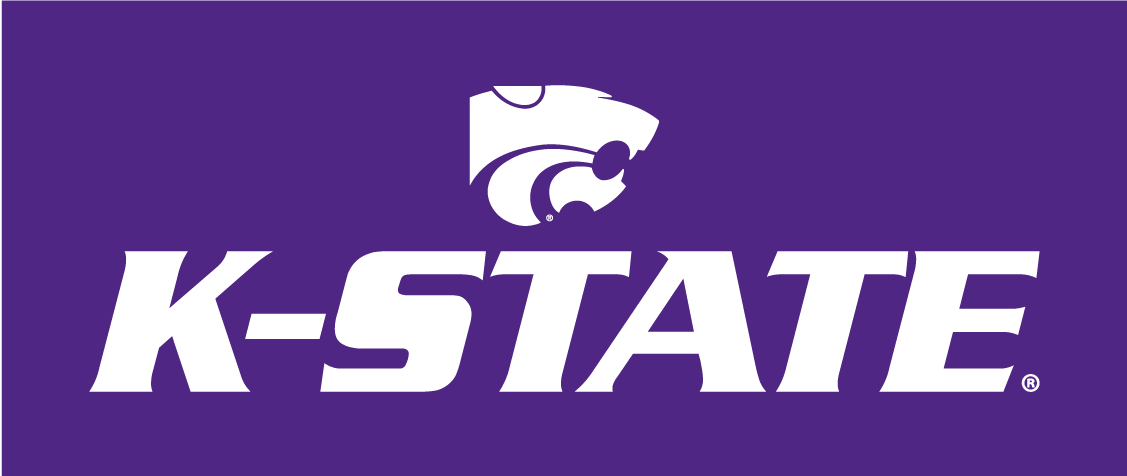

In [244]:
from IPython.display import Image
Image("data/k_state.png")

In [245]:
import csv
import pandas as pd
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)


from textblob import TextBlob

import nltk
from nltk.corpus import stopwords

In [246]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Identification and Collection

**Source:** Twitter

**Method of Data Collection:** Used NodeXLGraph to extract data from Twitter. NodeXLGraph is a "free and open-source network analysis and visualization software package for Microsoft Excel." 

Source: https://nodexlgraphgallery.org/

## 2. Business and Data Understanding 

**Problem:** What is the general feeling of K-State online and what are people specifically talking about?

**Business Contexts**: K-State is a public college but still relies on student admissions to continue towards its positive growth plan called K-State 2025. "By 2025, Kansas State University will be recognized as one of the nation’s Top 50 Public Research Universities."

**Significance of problem:** The more knowledge the school has of the general feeling of the school, the more confident it can feel on its progress throughout the years as a public college institution striving to grow in reputation.

**Business Value of Solution:** With this analysis, K-State can focus on what it is doing right according to the public and improve or stop alltogether programs/events the public feels negatively about. 

## 3. Business Intelligence 

 How people overall feel about K-State as an institution?
 
 What words are most popular among K-State tweets?

 Who are the most visible/popular users?

 Is the new Multicultural Center being talked about?

### Import Data

In [247]:
df = pd.read_csv('data/Final Data.csv',encoding= 'ISO-8859-1')
df.head()

,Vertex 1,Vertex 2,ID,Dynamic Filter,Relationship,Relationship Date (UTC),Description,Location,Unnamed: 8,Tweet,...,Domains in Tweet,Hashtags in Tweet,Tweet Date (UTC),Twitter Page for Tweet,Latitude,Longitude,Followed,Followers,Tweets,Favorites
0,snyder_cat,golden_hands3,3,NaN,Mentions,43577.07361,Ain't no party like my Nana's tea party.,NaN,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,...,NaN,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/snyder_cat/status/1120141914743955456,NaN,NaN,103.0,42.0,2210.0,2025.0
1,richhomiesam6,golden_hands3,4,NaN,Mentions,43577.07361,only fear god!!rip paw?? class of 2020?? / 60 170 3??ATH #wamp?? KANSAS STATE COMMIT??,"Louisiana, USA",NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,...,NaN,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/richhomiesam6/status/1120141915658309632,NaN,NaN,383.0,1268.0,634.0,3728.0
2,soundsbyswang,golden_hands3,5,NaN,Mentions,43577.07431,3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !,"Central, LA",NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,...,NaN,emaw20 kstate wampville,43577.07431,https://twitter.com/#!/soundsbyswang/status/1120142084164526080,NaN,NaN,3474.0,1516.0,1079.0,4163.0
3,sayewoog,golden_hands3,6,NaN,Mentions,43577.07500,https://t.co/9izBu3BnHe,NaN,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,...,NaN,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/sayewoog/status/1120142291237257216,NaN,NaN,339.0,499.0,12704.0,7275.0
4,mufasasonn,golden_hands3,7,NaN,Mentions,43577.07500,Just Live Your Life ? ig: sayewoog ?? | sc: trueballer_2002 ??,NaN,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,...,NaN,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/mufasasonn/status/1120142342726541312,NaN,NaN,92.0,47.0,165.0,155.0


## 4. Data Cleaning

In [248]:
# learn more about the data at a high level
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 21 columns):
Vertex 1                   6591 non-null object
Vertex 2                   6591 non-null object
ID                         6591 non-null int64
Dynamic Filter             0 non-null float64
Relationship               6591 non-null object
Relationship Date (UTC)    6591 non-null float64
Description                3169 non-null object
Location                   2679 non-null object
Unnamed: 8                 0 non-null float64
Tweet                      6591 non-null object
URLs in Tweet              1998 non-null object
Domains in Tweet           1998 non-null object
Hashtags in Tweet          2222 non-null object
Tweet Date (UTC)           6591 non-null float64
Twitter Page for Tweet     6591 non-null object
Latitude                   78 non-null float64
Longitude                  78 non-null float64
Followed                   3548 non-null float64
Followers                  3548 n

In [249]:
#Here we decide to drop information that we deemed not important for our reserch or did not provide any specific insights.
df = df.drop('ID', axis=1)
df = df.drop('Dynamic Filter', axis=1)
df= df.drop('Domains in Tweet', axis=1)
df = df.drop('URLs in Tweet', axis=1)
df = df.drop( 'Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Unnamed: 8', axis=1)
df.head()

,Vertex 1,Vertex 2,Relationship,Relationship Date (UTC),Description,Location,Tweet,Hashtags in Tweet,Tweet Date (UTC),Twitter Page for Tweet,Followed,Followers,Tweets,Favorites
0,snyder_cat,golden_hands3,Mentions,43577.07361,Ain't no party like my Nana's tea party.,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/snyder_cat/status/1120141914743955456,103.0,42.0,2210.0,2025.0
1,richhomiesam6,golden_hands3,Mentions,43577.07361,only fear god!!rip paw?? class of 2020?? / 60 170 3??ATH #wamp?? KANSAS STATE COMMIT??,"Louisiana, USA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/richhomiesam6/status/1120141915658309632,383.0,1268.0,634.0,3728.0
2,soundsbyswang,golden_hands3,Mentions,43577.07431,3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !,"Central, LA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07431,https://twitter.com/#!/soundsbyswang/status/1120142084164526080,3474.0,1516.0,1079.0,4163.0
3,sayewoog,golden_hands3,Mentions,43577.07500,https://t.co/9izBu3BnHe,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/sayewoog/status/1120142291237257216,339.0,499.0,12704.0,7275.0
4,mufasasonn,golden_hands3,Mentions,43577.07500,Just Live Your Life ? ig: sayewoog ?? | sc: trueballer_2002 ??,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/mufasasonn/status/1120142342726541312,92.0,47.0,165.0,155.0


In [250]:
df = df.rename(columns={'Vertex 1': 'Screen Name'})
df = df.rename(columns={'Vertex 2': 'Ment. Screen Name'})
df = df.rename(columns={'Twitter Page for Tweet': 'Url'})
df = df.rename(columns={'Description': 'Text'})

df.head()

,Screen Name,Ment. Screen Name,Relationship,Relationship Date (UTC),Text,Location,Tweet,Hashtags in Tweet,Tweet Date (UTC),Url,Followed,Followers,Tweets,Favorites
0,snyder_cat,golden_hands3,Mentions,43577.07361,Ain't no party like my Nana's tea party.,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/snyder_cat/status/1120141914743955456,103.0,42.0,2210.0,2025.0
1,richhomiesam6,golden_hands3,Mentions,43577.07361,only fear god!!rip paw?? class of 2020?? / 60 170 3??ATH #wamp?? KANSAS STATE COMMIT??,"Louisiana, USA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/richhomiesam6/status/1120141915658309632,383.0,1268.0,634.0,3728.0
2,soundsbyswang,golden_hands3,Mentions,43577.07431,3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !,"Central, LA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07431,https://twitter.com/#!/soundsbyswang/status/1120142084164526080,3474.0,1516.0,1079.0,4163.0
3,sayewoog,golden_hands3,Mentions,43577.07500,https://t.co/9izBu3BnHe,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/sayewoog/status/1120142291237257216,339.0,499.0,12704.0,7275.0
4,mufasasonn,golden_hands3,Mentions,43577.07500,Just Live Your Life ? ig: sayewoog ?? | sc: trueballer_2002 ??,NaN,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/mufasasonn/status/1120142342726541312,92.0,47.0,165.0,155.0


In [251]:
# find out missing values
df.isnull().sum()

Screen Name                0   
Ment. Screen Name          0   
Relationship               0   
Relationship Date (UTC)    0   
Text                       3422
Location                   3912
Tweet                      0   
Hashtags in Tweet          4369
Tweet Date (UTC)           0   
Url                        0   
Followed                   3043
Followers                  3043
Tweets                     3043
Favorites                  3043
dtype: int64

In [252]:
len(df)

6591

In [253]:
#handling missing value: remove the rows with any missing value
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 3544
Data columns (total 14 columns):
Screen Name                900 non-null object
Ment. Screen Name          900 non-null object
Relationship               900 non-null object
Relationship Date (UTC)    900 non-null float64
Text                       900 non-null object
Location                   900 non-null object
Tweet                      900 non-null object
Hashtags in Tweet          900 non-null object
Tweet Date (UTC)           900 non-null float64
Url                        900 non-null object
Followed                   900 non-null float64
Followers                  900 non-null float64
Tweets                     900 non-null float64
Favorites                  900 non-null float64
dtypes: float64(6), object(8)
memory usage: 105.5+ KB


In [254]:
df1.describe()

,Relationship Date (UTC),Tweet Date (UTC),Followed,Followers,Tweets,Favorites
count,900.000000,900.000000,900.000000,9.000000e+02,900.000000,900.000000
mean,43580.679811,43580.679811,1154.853333,4.528281e+05,18028.184444,8583.706667
std,2.241859,2.241859,3651.918253,4.148619e+06,40884.190562,19581.662970
min,43577.073610,43577.073610,0.000000,0.000000e+00,1.000000,0.000000
25%,43579.546877,43579.546877,260.250000,2.857500e+02,864.250000,544.500000
50%,43580.138195,43580.138195,539.000000,8.515000e+02,3804.500000,2360.500000
75%,43581.997220,43581.997220,993.000000,3.519250e+03,15037.500000,8155.750000
max,43585.896530,43585.896530,61435.000000,6.239090e+07,603112.000000,195986.000000


In [255]:
df1.to_csv("data/cleanedData.csv")

## 4.B Text Processing

In [352]:
ksu = []
openfile = open('data/cleanedData.csv', 'r')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    ksu.append(i)    
openfile.close()

#print(ksu)

In [257]:
# below is a function for text cleaning

def text_processing(ksu):
    # what if you have additional stopwords to be removed
    tokens = str(ksu)
    #lowecases
    tokens = tokens.lower()
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
    #additional stopwrods
    more_stopwords = set(('kstate', 'http', 'twitter', 'com', 'status', 'mention', 'kansa', 'state', 'tweet', 'ksu'))
    extra_stoplist = set(stopwords.words('english')) | more_stopwords
    tokens = (word for word in tokens if word not in extra_stoplist)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    return tokens

In [258]:
fdist = nltk.FreqDist(text_processing(ksu))
fdist

FreqDist({'university': 211, 'manhattan': 194, 'golden': 166, 'wampville': 144, 'fvmous': 131, 'tripp': 131, 'recruiting': 122, 'fan': 115, 'offer': 112, 'student': 106, ...})

In [259]:
bgs = nltk.bigrams(text_processing(ksu))
nltk.FreqDist(bgs)

FreqDist({('fvmous', 'tripp'): 131, ('blessed', 'receive'): 90, ('receive', 'offer'): 90, ('offer', 'university'): 90, ('recruiting', 'studentathletes'): 80, ('golden', 'wampville'): 72, ('wampville', 'wampville'): 72, ('tripp', 'blessed'): 60, ('dalton', 'risner'): 41, ('khprecruiting', 'kstatesports'): 41, ...})

## 5. Descriptive Analytics & Content analytics

### Sentiment Analysis (Using TextBlob)

In [260]:
#remove the extra bracket
ksu = [x for y in ksu for x in y]
ksu[:2]

['', 'Screen Name']

In [261]:
# seperating postive and negative tweets 
positive_review = []
negative_review = []
neutral_review = []

for row in ksu:
    # tweet = row[0] already removed extra bracket 
    score = TextBlob(row).sentiment.polarity
    if score > 0:
        positive_review.append(row)
    elif score == 0:
        neutral_review.append(row)
    else:
        negative_review.append(row)

In [262]:
print(len(positive_review))
print(len(negative_review))
print(len(neutral_review))

625
153
12737


* 653 Positive words
* 153 Negative words
* 12,737 Neutral words

### Positive Sentiment Analysis

In [263]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [264]:
# remove extra brackets)
cleaned_positive_ksu_tokens = [x for y in texts for x in y]
cleaned_positive_ksu_tokens[:10]

['jackson',
 'goodwell',
 'passionate',
 'using',
 'platform',
 'glorify',
 'one',
 'gave',
 'ability',
 'love']

In [265]:
# word frequency
from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_ksu_tokens)
positive_review_wordcounts.most_common(5)

[('kstate', 254), ('state', 60), ('new', 57), ('welcome', 51), ('day', 51)]

### Word Cloud

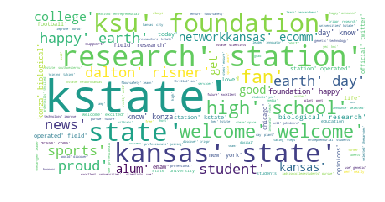

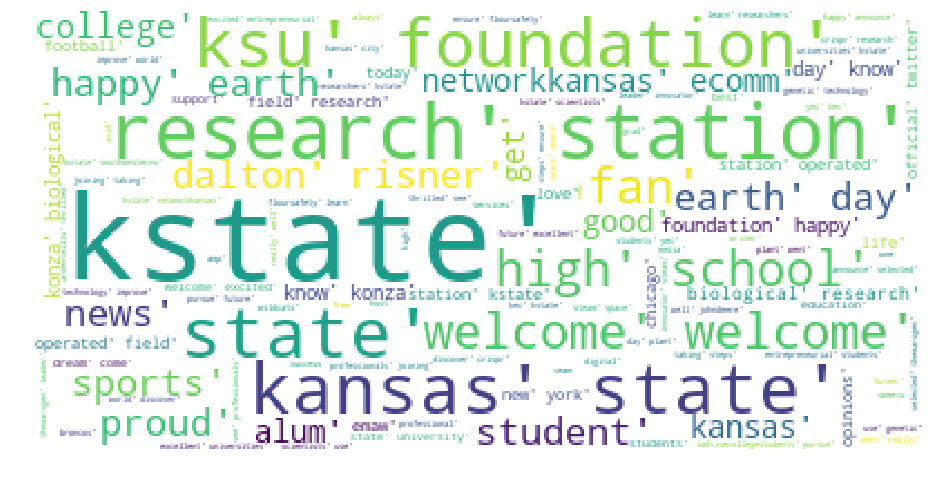

In [266]:
# This process could be very slow for a large corpus
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = str(cleaned_positive_ksu_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

In [267]:
extra = pd.read_csv('data/cleanedData.csv')

In [274]:
# Top 5 with most tweets made
extra.sort_values(by=['Tweets'], ascending=False).head()
extra1 = extra[['Screen Name','Tweets']]
extra1.head()

,Screen Name,Tweets
0,richhomiesam6,634.0
1,soundsbyswang,1079.0
2,fields2official,36197.0
3,eskiddy3,2753.0
4,thomaspeeke,10503.0


In [275]:
# how many unique users in the dataset

extra_count_unique_user = extra['Screen Name'].value_counts()
extra_count_unique_user.head()

banazir         29
kstate_0        19
kstate_fan      18
kstatealumni    17
kstateartsci    13
Name: Screen Name, dtype: int64

In [276]:
# number of unique users

extra_count_unique_user.shape

(465,)

Most popular screen names

In [277]:
# using collections python library to count
from collections import Counter

fdist = list(Counter(" ".join(df['Screen Name']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(5)

,0,1
1097,kstate_0,280
1218,banazir,177
1179,kstate_fan,166
1105,kstate_superfan,100
1225,kstate_union,94


### Text classfication

In [278]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [279]:
df1.head()

,Screen Name,Ment. Screen Name,Relationship,Relationship Date (UTC),Text,Location,Tweet,Hashtags in Tweet,Tweet Date (UTC),Url,Followed,Followers,Tweets,Favorites
1,richhomiesam6,golden_hands3,Mentions,43577.07361,only fear god!!rip paw?? class of 2020?? / 60 170 3??ATH #wamp?? KANSAS STATE COMMIT??,"Louisiana, USA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07361,https://twitter.com/#!/richhomiesam6/status/1120141915658309632,383.0,1268.0,634.0,3728.0
2,soundsbyswang,golden_hands3,Mentions,43577.07431,3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !,"Central, LA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07431,https://twitter.com/#!/soundsbyswang/status/1120142084164526080,3474.0,1516.0,1079.0,4163.0
5,fields2official,golden_hands3,Mentions,43577.07500,LongLiveJames???????? DB at OP$U????,"Jackson, MS ??Goodwell, OK",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07500,https://twitter.com/#!/fields2official/status/1120142345763270656,1367.0,1266.0,36197.0,24159.0
6,eskiddy3,golden_hands3,Mentions,43577.07569,C/O 2021. |ATH| #louisianimal??X.XXIX.MMII. LaBootlegger?? HELEN COX HIGHSCHOOL,United States,RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07569,https://twitter.com/#!/eskiddy3/status/1120142489015525382,544.0,618.0,2753.0,12205.0
8,thomaspeeke,golden_hands3,Mentions,43577.07569,Master in Bouncy Science,"Seattle, WA",RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ,emaw20 kstate wampville,43577.07569,https://twitter.com/#!/thomaspeeke/status/1120142546196365317,1099.0,262.0,10503.0,6254.0


In [315]:
df2_list =df1.values
df2_list[:2]

array([['richhomiesam6', 'golden_hands3', 'Mentions', 43577.07361,
        'only fear god!!rip paw?? class of 2020?? / 6\x920 170 3??ATH #wamp?? KANSAS STATE COMMIT??',
        'Louisiana, USA',
        'RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ',
        'emaw20 kstate wampville', 43577.07361,
        'https://twitter.com/#!/richhomiesam6/status/1120141915658309632',
        383.0, 1268.0, 634.0, 3728.0],
       ['soundsbyswang', 'golden_hands3', 'Mentions', 43577.07431,
        "3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !",
        'Central, LA',
        'RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ',
        'emaw20 kstate wampville', 43577.07431,
        'https://twitter.com/#!/soundsbyswang/status/1120142084164526080',
        3474.0, 1516.0, 1079.0, 4163.0]], dtype=object)

In [316]:
all = []
review = []
sentiment = []

for i in df2_list:
    all.append(i)
    review.append(i[0])
    sentiment.append(i[1])
    
print(len(all), len(review), len(sentiment))

900 900 900


In [317]:
# first column
sms_data = []
# second colummn
sms_labels = []
# both columns
sms = []

openfile = open('data/cleanedData.csv', 'r', encoding= 'ISO-8859-1')

r = csv.reader(openfile)

for i in r:
    sms.append(i)
    sms_data.append(i[0])
    sms_labels.append(i[1])
    
openfile.close()

In [318]:
#entire data
print(len(sms))
#texts only
print(len(sms_data))
#labels only
print(len(sms_labels))

901
901
901


In [319]:
print(sms_labels.count('neg'))
print(sms_labels.count('pos'))

0
0


In [331]:
# view first five rows
sms[:2]

[['',
  'Screen Name',
  'Ment. Screen Name',
  'Relationship',
  'Relationship Date (UTC)',
  'Text',
  'Location',
  'Tweet',
  'Hashtags in Tweet',
  'Tweet Date (UTC)',
  'Url',
  'Followed',
  'Followers',
  'Tweets',
  'Favorites'],
 ['1',
  'richhomiesam6',
  'golden_hands3',
  'Mentions',
  '43577.07361',
  'only fear god!!rip paw?? class of 2020?? / 6Â\x920 170 3??ATH #wamp?? KANSAS STATE COMMIT??',
  'Louisiana, USA',
  'RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ',
  'emaw20 kstate wampville',
  '43577.07361',
  'https://twitter.com/#!/richhomiesam6/status/1120141915658309632',
  '383.0',
  '1268.0',
  '634.0',
  '3728.0']]

In [321]:
sms_labels[:5]

['Screen Name',
 'richhomiesam6',
 'soundsbyswang',
 'fields2official',
 'eskiddy3']

In [339]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(sms_data)

In [340]:
# removing stopwords

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sms_data)

In [341]:
# document-term matrix using tfidf

tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [342]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=sms_data,columns=tfidf_vectorizer.get_feature_names()).head()

,10,1019,102,1020,1024,1026,1030,1033,1034,1047,...,97,970,973,976,980,981,982,983,99,991
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [343]:
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(720, 720, 181, 181)

In [344]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print(X_train[:2])
print("+++++++++++++++++++++++++++++++++++++++++")
print(X_test)

  (0, 482)	1.0
  (1, 210)	1.0
+++++++++++++++++++++++++++++++++++++++++



In [345]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)

0.027624309392265192

This tells us that it is only 28% accurate, which means this is not a good model to predict a word being positive or negative

In [346]:
predicted[:3]

array(['banazir', 'banazir', 'banazir'], dtype='<U15')

In [347]:
print(y_test)

['profboyacioglu', 'izengiepai', 'wildkatphoto', 'kstate', 'timothyjshaffer', 'dn7six', 'chidambara09', 'eligreat_1', 'carsonromero2', 'glotzbachkeith', 'kstateolathe', 'camila_srivera', 'kssuperstore', 'elibernstein33', 'kstate_0', 'kstateartsci', 'kstatealumni', 'sirjamesradio', 'womenofkstate', 'santos95660', 'bg9711', 'caleb_holstein6', 'tshegongwaga', 'jaredsuth86', 'osu_npk', 'strawnbob', 'jaydendixonveal', 'ksucrops', 'triston_rich', 'visitmhk', 'kstate_fan', 'jeff_rosen88', 'sonnyjose45', 'kstatealumni', 'martinblakecram', 'num1broncofan18', 'scsharkrecruits', 'imajayhawk', 'holyfrijoles__', 'fanman_ksu', 'strawnbob', 'banazir', 'perr_54', 'ksu901', 'cshlmeetings', 'kstate_ctl', 'kstate', 'chris07970882', 'pauljavion14', 'triston_rich', 'jjsportmo', 'kstate_ctl', 'grantflanders', 'kimwhitson1', 'valerie48172708', 'westcoastrng', 'benkohl', 'kstatealumni', 'manhattanpl', 'lldeanda', 'startupcats', 'vbehzadan', 'ksu_foundation', 'kstateartsci', 'justamom48xos', 'kstatekcare', 'de

In [348]:
print('\n overall accuracy:')
print(metrics.accuracy_score(y_test, predicted))



 overall accuracy:
0.027624309392265192


28% classification accuracy ... not the bestclassification model ... 
- 0 positive review is correctly classified as positive review
- 0 negative reviews are correctly classificed as negative reviews


## 6. Network analytics
▪ Data preparation in Jupyter Notebook & network visualization w/ Gephi ▪ Network visualization & Clustering groups▪ Node-level metrics (e.g., who are influential?) & Network-level metrics

In [302]:
import csv
import pandas as pd
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

import itertools
import collections

In [303]:
tweets = df1.values
len(tweets)

900

In [304]:
for tweet in tweets[:2]:
    print(tweet)

['richhomiesam6' 'golden_hands3' 'Mentions' 43577.07361
 'only fear god!!rip paw?? class of 2020?? / 6\x920 170 3??ATH #wamp?? KANSAS STATE COMMIT??'
 'Louisiana, USA'
 'RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ'
 'emaw20 kstate wampville' 43577.07361
 'https://twitter.com/#!/richhomiesam6/status/1120141915658309632' 383.0
 1268.0 634.0 3728.0]
['soundsbyswang' 'golden_hands3' 'Mentions' 43577.07431
 "3?? QB/ATH //class of 20'// student athlete// glory to god /#ManOnAMission 2x state champion. 22/ACT 2.8 GPA. LA Bootleggers ?? 4.38 Laser 40 !"
 'Central, LA'
 'RT @golden_hands3: C O M M I T T E D ??\n#EMAW20 #KState #WAMPVILLE https://t.co/apVi9d1KDJ'
 'emaw20 kstate wampville' 43577.07431
 'https://twitter.com/#!/soundsbyswang/status/1120142084164526080' 3474.0
 1516.0 1079.0 4163.0]


In [305]:
# Create list of lists containing bigrams in reviews 
terms_bigram = [list(bigrams(i)) for i in texts]

In [306]:
# View bigrams for the first review
terms_bigram[0]

[('jackson', 'goodwell')]

In [307]:
terms_bigram[1]

[('passionate', 'using'),
 ('using', 'platform'),
 ('platform', 'glorify'),
 ('glorify', 'one'),
 ('one', 'gave'),
 ('gave', 'ability'),
 ('ability', 'love'),
 ('love', 'former'),
 ('former', 'kansas'),
 ('kansas', 'state'),
 ('state', 'university'),
 ('university', 'athlete'),
 ('athlete', 'lefflerprimeperfomance')]

In [308]:
for i in terms_bigram[:3]:
    for j in i:
        print(j)

('jackson', 'goodwell')
('passionate', 'using')
('using', 'platform')
('platform', 'glorify')
('glorify', 'one')
('one', 'gave')
('gave', 'ability')
('ability', 'love')
('love', 'former')
('former', 'kansas')
('kansas', 'state')
('state', 'university')
('university', 'athlete')
('athlete', 'lefflerprimeperfomance')
('welder', 'superior')
('superior', 'services')
('services', 'father')
('father', 'lakers')
('lakers', 'pelicans')
('pelicans', 'lsu')
('lsu', 'saints')
('saints', 'jets')
('jets', 'fan')


In [309]:
outfile = open("data/bigram_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in terms_bigram:
    for j in i:
        w.writerow(j)    
outfile.close()

In [310]:
# https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-bigrams-networks-in-python/
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('research', 'station'), 30),
 (('kansas', 'state'), 24),
 (('ksu', 'foundation'), 23),
 (('welcome', 'welcome'), 22),
 (('high', 'school'), 21),
 (('happy', 'earth'), 21),
 (('earth', 'day'), 21),
 (('dalton', 'risner'), 19),
 (('networkkansas', 'ecomm'), 16),
 (('foundation', 'happy'), 15),
 (('day', 'know'), 15),
 (('know', 'konza'), 15),
 (('konza', 'biological'), 15),
 (('biological', 'research'), 15),
 (('station', 'operated'), 15),
 (('operated', 'field'), 15),
 (('field', 'research'), 15),
 (('station', 'kstate'), 15),
 (('new', 'york'), 14),
 (('official', 'twitter'), 13)]

In [311]:
for i in bigram_counts.most_common(20):
    print(i[0][0], i[0][1], i[1])

research station 30
kansas state 24
ksu foundation 23
welcome welcome 22
high school 21
happy earth 21
earth day 21
dalton risner 19
networkkansas ecomm 16
foundation happy 15
day know 15
know konza 15
konza biological 15
biological research 15
station operated 15
operated field 15
field research 15
station kstate 15
new york 14
official twitter 13


In [312]:
keywords = []
for i in bigram_counts.most_common(20):
    keywords.append([i[0][0], i[0][1], i[1]])

keywords_df = pd.DataFrame(keywords)
keywords_df = keywords_df.rename(columns={0:'node1', 1:'node2', 2:'weight'})
keywords_df.head()

,node1,node2,weight
0,research,station,30
1,kansas,state,24
2,ksu,foundation,23
3,welcome,welcome,22
4,high,school,21


## Gephi 

### Users with highest Betweenness Centrality

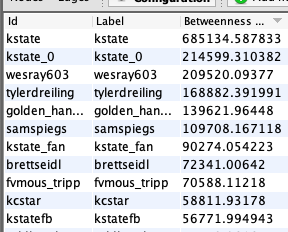

In [349]:
from IPython.display import Image
Image("data/centrality.png")

Having a high Betweenness Centrality means these users have a very strong connection with others on the network. Kstate being the top one makes sense due to them being our main focus and search term when collecting data. 

### Users with highest Modularity

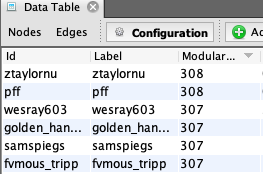

In [350]:
from IPython.display import Image
Image("data/Modularity.png")

Having a high Modularity means these users have dense connections between nodes within modules but not when it comes to nodes in different modules. 

### Users with highest Degree

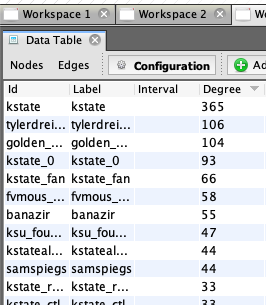

In [351]:
from IPython.display import Image
Image("data/Degree.png")

Having a higher degree value means you are more "popular" on the network. K-State once again is on top of this list due to the fact it is our main topic and second is the user tyler who more than likely is well connected to the university. 

### These are the top 3 groups in the network

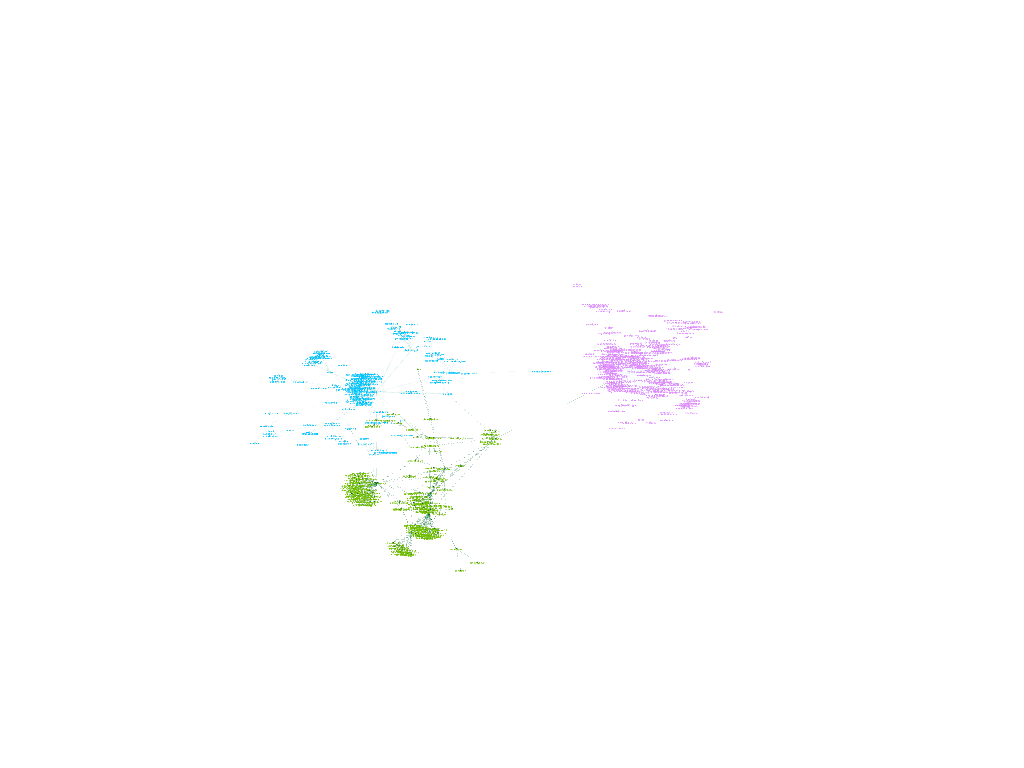

In [425]:
from IPython.display import Image
Image("data/top 3 modul.png")

### These are the top 8 groups in the network

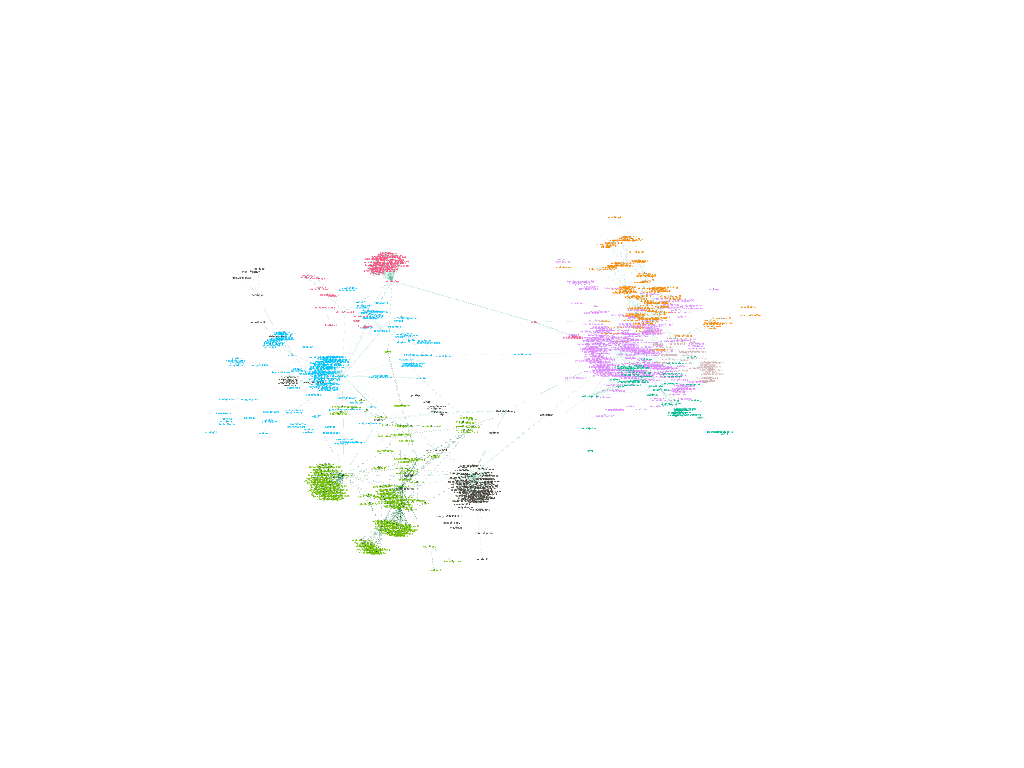

In [426]:
from IPython.display import Image
Image("data/final top 8 modu.png")

This is more of an overall view of the network which depicts every user individually. As you can see, in the middle of the network are the main users most correlated with others. While the ones on the outside are more outliers or those not as frequent on tweeting about K-State or mentioning others. 

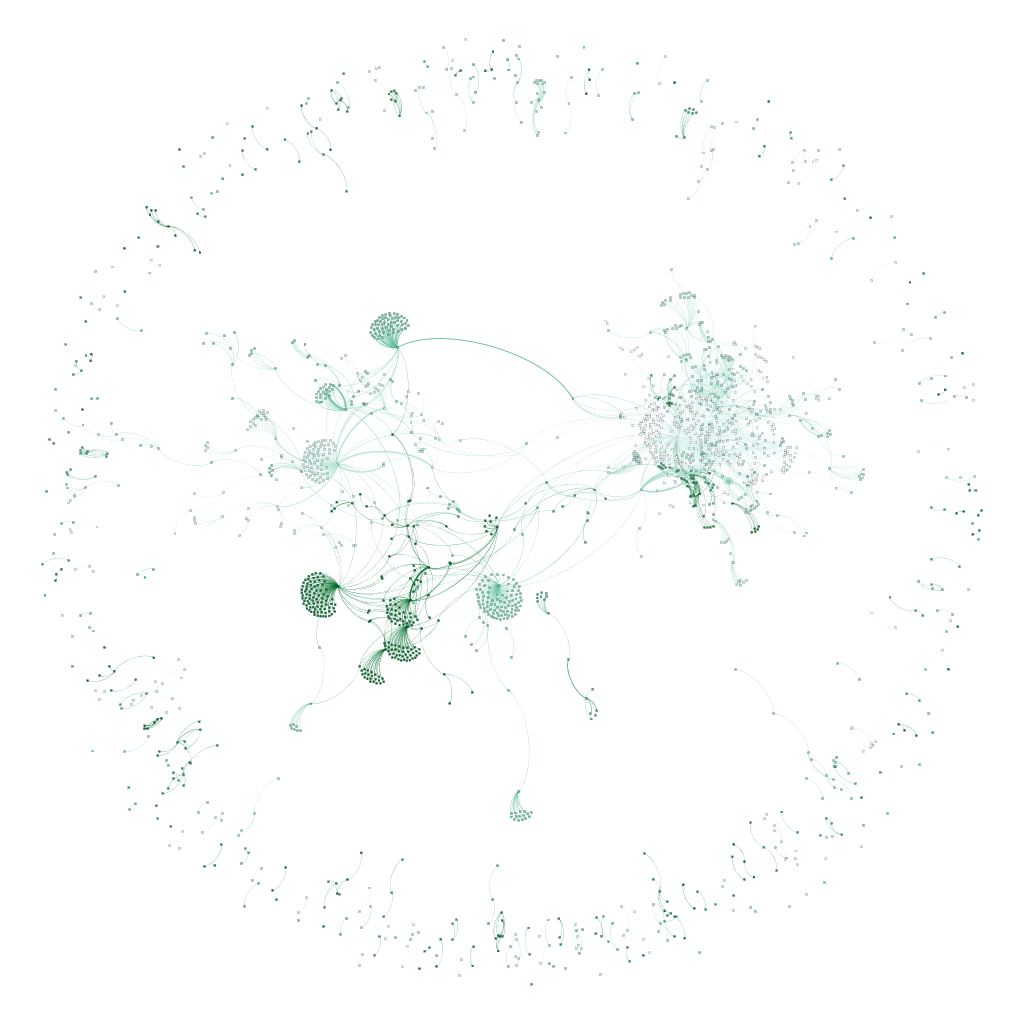

In [427]:
from IPython.display import Image
Image("data/Untitled.png")

In [428]:
df3.to_csv('data/keywords_network_matrix.csv')

## 7. Final analysis & storytelling

So first we are going to start off with answer or business questions we were given:

 How people overall feel about K-State as an institution?
* After doing the sentiment analysis we were able to determine that people have a general positive feeling on K-State. We came to this result from the higher number of positive words in the tweets than negative.
 What words are most popular among K-State tweets?
* The most popular ones are listed above. They revolved around the university culture and due to the time we extracted the data, revolved are K-State football recruits for next year. 

 Who are the most visible/popular users?
* Using Gephi, anything with kstate or ksu involved in the screen name is highly likely to be very popular. The most popular is of course kstate which is the official account for K-State University.

 Is the new Multicultural Center being talked about?
* Not as much as it probably should be when it comes to the high investment K-State is making on it. 
 
 Some of the things we noticed while we were doing the project was that after looking through our data we found there were many missing values for different variable. After discusiing different ways to go about handling the missing informatin, we concluded the best way to handle it is  by aggressivly dropping any column with missing values. We did this in order to keep the authenticity of the data and not manipulate it in a way that would alter the accuracy of our results. Data such as favorites, followers, and those following are unique to each twitter user and can vary highly. Going from 6,591 tweets to 900 filled with complete values.
 
 We would suggestin the future if one chooses to work on this project to be experienced with NodeXL and how to transfer that data to Python in an effective and user-friendly way. This part we struggled with the most due to it not being a straight-forward CSV file that we could simply upload and work with. It took time to manipulate. 
 
 Having more experience with Gephi is very helpful as well due to the numerous statistics it provides. Being able to articulate what each one means and being able to present the most important ones to specific clients is vital to truly get your point across. 
 
 **Conclusion**
 

This is potential useful to our clients because social media is the main way to reach out to college students. As current students ourselves, we understand how engulfed our generation is on social media and how we use it to discuss what we are thinking and feeling at the moment. K-State can use this to their advantage to increase admission rates to their campus and continue to grow as an institution. Both in size, and reputation. 